# Final Models

### Tassos Fragkos & Jeff J. Andrews

In this notebook we are calculating relevant timescales for different donor and accretor stars at various times throughout the donor's lifetime. 

In [1]:
# modules
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import odeint
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

%matplotlib inline

In [2]:
# constants in cgs
Gconst = 6.674e-8
Msun = 1.989e33
Rsun = 6.957e10
secday = 3600.0*24.0
secyear = secday * 365.25

### Load MESA data

In [3]:
data_dir = '../paperI/init_models/'

# 30 Msun giant

# 1000 Rsun
file_dir = data_dir + '8M_30M_1000R_final.data'
M30_1000R = np.genfromtxt(file_dir, skip_header=5, names=True)

# 1400 Rsun
file_dir = data_dir + '8M_30M_1400R_final.data'
M30_1400R = np.genfromtxt(file_dir, skip_header=5, names=True)

# 600 Rsun
file_dir = data_dir + '8M_30M_600R_final.data'
M30_600R = np.genfromtxt(file_dir, skip_header=5, names=True)

# 800 Rsun
file_dir = data_dir + '8M_30M_800R_final.data'
M30_800R = np.genfromtxt(file_dir, skip_header=5, names=True)



# 1000 Rsun
file_dir = data_dir + 'giant_30M_1000R.data'
M30_1000R_initial = np.genfromtxt(file_dir, skip_header=5, names=True)

# 1400 Rsun
file_dir = data_dir + 'giant_30M_1400R.data'
M30_1400R_initial = np.genfromtxt(file_dir, skip_header=5, names=True)

# 600 Rsun
file_dir = data_dir + 'giant_30M_600R.data'
M30_600R_initial = np.genfromtxt(file_dir, skip_header=5, names=True)

# 800 Rsun
file_dir = data_dir + 'giant_30M_800R.data'
M30_800R_initial = np.genfromtxt(file_dir, skip_header=5, names=True)

### Mass Profile

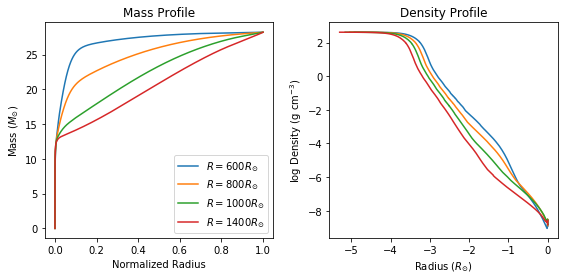

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

R_600 = 10**M30_600R_initial['logR'][0]
R_800 = 10**M30_800R_initial['logR'][0]
R_1000 = 10**M30_1000R_initial['logR'][0]
R_1400 = 10**M30_1400R_initial['logR'][0]


# Mass profile - linear
ax[0].plot(10**M30_600R_initial['logR']/R_600, M30_600R_initial['mass'], label=r'$R = 600 R_{\odot}$')
ax[0].plot(10**M30_800R_initial['logR']/R_800, M30_800R_initial['mass'], label=r'$R = 800 R_{\odot}$')
ax[0].plot(10**M30_1000R_initial['logR']/R_1000, M30_1000R_initial['mass'], label=r'$R = 1000 R_{\odot}$')
ax[0].plot(10**M30_1400R_initial['logR']/R_1400, M30_1400R_initial['mass'], label=r'$R = 1400 R_{\odot}$')
# ax[0,0].plot(M30_600R_initial['mass'], 10**M30_600R_initial['logR']/R_600, label=r'$R = 600 R_{\odot}$')
# ax[0,0].plot(M30_800R_initial['mass'], 10**M30_800R_initial['logR']/R_800, label=r'$R = 800 R_{\odot}$')
# ax[0,0].plot(M30_1000R_initial['mass'], 10**M30_1000R_initial['logR']/R_1000, label=r'$R = 1000 R_{\odot}$')
# ax[0,0].plot(M30_1400R_initial['mass'], 10**M30_1400R_initial['logR']/R_1400, label=r'$R = 1400 R_{\odot}$')


ax[0].set_xlabel(r"Normalized Radius")
ax[0].set_ylabel(r"Mass ($M_{\odot}$)")
ax[0].set_title("Mass Profile")

# Mass profile - log
# ax[0,1].plot(10**M30_600R_initial['logR']/R_600, M30_600R_initial['mass'], label=r'$R = 600 R_{\odot}$')
# ax[0,1].plot(10**M30_800R_initial['logR']/R_800, M30_800R_initial['mass'], label=r'$R = 800 R_{\odot}$')
# ax[0,1].plot(10**M30_1000R_initial['logR']/R_1000, M30_1000R_initial['mass'], label=r'$R = 1000 R_{\odot}$')
# ax[0,1].plot(10**M30_1400R_initial['logR']/R_1400, M30_1400R_initial['mass'], label=r'$R = 1400 R_{\odot}$')
# ax[0,1].plot(M30_600R_initial['mass'], 10**M30_600R_initial['logR']/R_600, label=r'$R = 600 R_{\odot}$')
# ax[0,1].plot(M30_800R_initial['mass'], 10**M30_800R_initial['logR']/R_800, label=r'$R = 800 R_{\odot}$')
# ax[0,1].plot(M30_1000R_initial['mass'], 10**M30_1000R_initial['logR']/R_1000, label=r'$R = 1000 R_{\odot}$')
# ax[0,1].plot(M30_1400R_initial['mass'], 10**M30_1400R_initial['logR']/R_1400, label=r'$R = 1400 R_{\odot}$')

# ax[0,1].set_xlabel(r"Radius ($R_{\odot}$)")
# ax[0,1].set_ylabel(r"Mass ($M_{\odot}$)")
# ax[0,1].set_yscale('log')
# ax[0,1].set_title("Mass Profile - Log")
# ax[0,1].set_ylim(1,2e3)


# Density profile - linear
# ax[1].plot(10**M30_600R_initial['logR']/R_600, M30_600R_initial['logRho'], label=r'$R = 600 R_{\odot}$')
# ax[1].plot(10**M30_800R_initial['logR']/R_800, M30_800R_initial['logRho'], label=r'$R = 800 R_{\odot}$')
# ax[1].plot(10**M30_1000R_initial['logR']/R_1000, M30_1000R_initial['logRho'], label=r'$R = 1000 R_{\odot}$')
# ax[1].plot(10**M30_1400R_initial['logR']/R_1400, M30_1400R_initial['logRho'], label=r'$R = 1400 R_{\odot}$')

ax[1].set_xlabel(r"Radius ($R_{\odot}$)")
ax[1].set_ylabel(r"log Density (g cm$^{-3}$)")
ax[1].set_title("Density Profile")


R_600 = 10**M30_600R_initial['logR'][0]
R_800 = 10**M30_800R_initial['logR'][0]
R_1000 = 10**M30_1000R_initial['logR'][0]
R_1400 = 10**M30_1400R_initial['logR'][0]


# Density profile - log
ax[1].plot(np.log10(10**M30_600R_initial['logR']/R_600), M30_600R_initial['logRho'], label=r'$R = 600 R_{\odot}$')
ax[1].plot(np.log10(10**M30_800R_initial['logR']/R_800), M30_800R_initial['logRho'], label=r'$R = 800 R_{\odot}$')
ax[1].plot(np.log10(10**M30_1000R_initial['logR']/R_1000), M30_1000R_initial['logRho'], label=r'$R = 1000 R_{\odot}$')
ax[1].plot(np.log10(10**M30_1400R_initial['logR']/R_1400), M30_1400R_initial['logRho'], label=r'$R = 1400 R_{\odot}$')

# ax[1,1].set_xlabel(r"Radius ($R_{\odot}$)")
# ax[1,1].set_ylabel(r"log Density (g cm$^{-3}$)")
# ax[1,1].set_xscale('log')
# ax[1,1].set_title("Density Profile - Log")
# ax[1,1].set_xlim(1,1e5)
# ax[1,1].set_ylim(-10, -1)

# Legend
ax[0].legend(loc=4)


plt.tight_layout()
plt.savefig("../figures/Initial_models_M30.pdf")
# plt.show()

### Calculate the gravitational potential

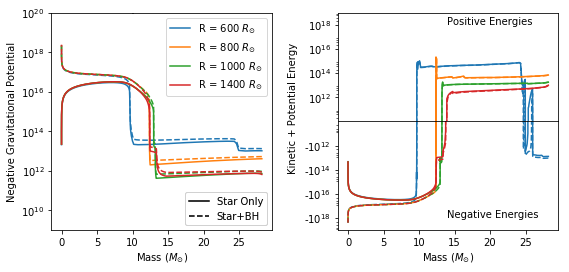

In [5]:
# fig, ax = plt.subplots(1, 2, figsize=(8,4))

models = [M30_600R, M30_800R, M30_1000R, M30_1400R]
labels = [r'R = 600 $R_{\odot}$', r'R = 800 $R_{\odot}$', r'R = 1000 $R_{\odot}$', r'R = 1400 $R_{\odot}$']
colors = ['C0', 'C1', 'C2', 'C3']


fig = plt.figure(figsize=(8,4))
fig.text(0.51, 0.75, 'Kinetic + Potential Energy', rotation='vertical')



gs = gridspec.GridSpec(2, 2)
gs.update(left=0.1, right=0.98, hspace=0.0, wspace=0.3)
ax0 = plt.subplot(gs[:,0])
ax1 = plt.subplot(gs[0,1])
ax2 = plt.subplot(gs[1,1])

# Gravitational potential plot
for i, model in enumerate(models):
    phi = Gconst * model['mass']*Msun / (10**model['logR']*Rsun)
    phi_BH = Gconst * 8.0*Msun / (10**model['logR']*Rsun)

    ax0.plot(model['mass'], phi, label=labels[i], color=colors[i])
    ax0.plot(model['mass'], phi+phi_BH, color=colors[i], linestyle='dashed')


# Add dummy lines for legend
ax0.plot([10,10],[1.0e20, 2.0e20], label='Star only', color='k', linestyle='solid')
ax0.plot([10,10],[1.0e20, 2.0e20], label='Star+BH', color='k', linestyle='dashed')
# plot_lines = []
# plot_lines.append([l1, l2])
# ax0.legend([l[0] for l in plot_lines], loc=4)


lines = ax0.get_lines()
legend1 = ax0.legend([lines[i] for i in [0,2,4,6]], labels, loc=1)
legend2 = ax0.legend([lines[i] for i in [8,9]], ["Star Only", "Star+BH"], loc=4)
ax0.add_artist(legend1)
ax0.add_artist(legend2)

ax0.set_ylim(1.0e9, 1.0e20)
    
ax0.set_yscale('log')

ax0.set_xlabel(r"Mass ($M_{\odot}$)")
ax0.set_ylabel('Negative Gravitational Potential')







# Total energy plot
for i, model in enumerate(models):
    phi = Gconst * model['mass']*Msun / (10**model['logR']*Rsun)
    phi_BH = Gconst * 8.0*Msun / (10**model['logR']*Rsun)
    kinetic = 0.5 * model['velocity']**2
    
    ax1.plot(model['mass'], kinetic - phi, label=labels[i], color=colors[i])
    ax1.plot(model['mass'], kinetic - (phi+phi_BH), color=colors[i], linestyle='dashed')
    

ax1.set_yscale('log')
ax1.set_ylim(1.0e10, 1.0e19)
ax1.set_yticks(10**np.linspace(12, 18, 4))
ax1.set_xlabel(r"Mass ($M_{\odot}$)")
# ax1.set_ylabel('Total Energy Positive')




# Total energy plot
for i, model in enumerate(models):
    phi = Gconst * model['mass']*Msun / (10**model['logR']*Rsun)
    phi_BH = Gconst * 8.0*Msun / (10**model['logR']*Rsun)
    kinetic = 0.5 * model['velocity']**2
    
    ax2.plot(model['mass'], phi - kinetic, label=labels[i], color=colors[i])
    ax2.plot(model['mass'], (phi+phi_BH) - kinetic, color=colors[i], linestyle='dashed')
    
    
ax2.set_xlabel(r"Mass ($M_{\odot}$)")
ax2.set_yscale('log')
ax2.set_ylim(1.0e19, 1.0e10)
# ax2.set_ylabel('Total Energy Negative')
ax2.set_yticks(10**np.linspace(18, 12, 4))
ax2.set_yticklabels([r"-10$^{18}$", r"-10$^{16}$", r"-10$^{14}$", r"-10$^{12}$"])


ax1.text(14, 1.0e18, "Positive Energies")
ax2.text(14, 1.0e18, "Negative Energies")



# plt.tight_layout()
plt.savefig("../figures/Final_models_M30.pdf")

plt.show()

### Calculate the effective alpha at the end of the simulation

In [11]:
models = [M30_600R, M30_800R, M30_1000R, M30_1400R]
models_initial = [M30_600R_initial, M30_800R_initial, M30_1000R_initial, M30_1400R_initial]

companion_position_mass = [9.62, 12.388, 12.984, 12.422]

In [12]:
# Calculate binding energies

binding_energy_envelope_final = []
binding_energy_envelope_unbound_final = []
binding_energy_core_final = []
binding_energy_final = []
for k, model in enumerate(models):

    binding_energy = 0.0
    binding_energy_core = 0.0
    binding_energy_envelope = 0.0
    binding_energy_envelope_unbound = 0.0
    for i in range(len(model)):
                            
        binding_energy += Gconst * model['dm'][i] * model['mass'][i]*Msun / (10**model['logR'][i]*Rsun)
        
        energy = 0.5 * model['velocity'][i]**2 - Gconst * model['mass'][i]*Msun / (10**model['logR'][i]*Rsun)
        
        if energy > 0.0 and model['y_mass_fraction_He'][i] < 0.5 and model['mass'][i] > companion_position_mass[k]:
            binding_energy_envelope_unbound += Gconst * model['dm'][i] * model['mass'][i]*Msun / (10**model['logR'][i]*Rsun)
            
        if model['y_mass_fraction_He'][i] < 0.5: 
            binding_energy_envelope += Gconst * model['dm'][i] * model['mass'][i]*Msun / (10**model['logR'][i]*Rsun)
        else:
            binding_energy_core += Gconst * model['dm'][i] * model['mass'][i]*Msun / (10**model['logR'][i]*Rsun)
        
    binding_energy_final.append(binding_energy)
    binding_energy_core_final.append(binding_energy_core)
    binding_energy_envelope_final.append(binding_energy_envelope)
    binding_energy_envelope_unbound_final.append(binding_energy_envelope_unbound)
    
    

binding_energy_initial = []    
binding_energy_core_initial = []
binding_energy_envelope_initial = []
for k, model in enumerate(models_initial):

    binding_energy = 0.0
    binding_energy_core = 0.0
    binding_energy_envelope = 0.0
    for i in range(len(model)):
        
        binding_energy += Gconst * model['dm'][i] * model['mass'][i]*Msun / (10**model['logR'][i]*Rsun)

        if model['y_mass_fraction_He'][i] < 0.5: 
            binding_energy_envelope += Gconst * model['dm'][i] * model['mass'][i]*Msun / (10**model['logR'][i]*Rsun)
        else:
            binding_energy_core += Gconst * model['dm'][i] * model['mass'][i]*Msun / (10**model['logR'][i]*Rsun)


    binding_energy_initial.append(binding_energy)
    binding_energy_core_initial.append(binding_energy_core)
    binding_energy_envelope_initial.append(binding_energy_envelope)
        
        
total_energy_initial = []
total_energy_envelope_initial = []
total_energy_core_initial = []
for k, model in enumerate(models_initial):
    total_energy_tmp = 0.0
    total_energy_envelope_tmp = 0.0
    total_energy_core_tmp = 0.0
    
    for i in range(len(model)):
        total_energy_tmp += model['dm'][i] * model['total_energy'][i]
        
        if model['y_mass_fraction_He'][i] < 0.5: 
            total_energy_envelope_tmp += model['dm'][i] * model['total_energy'][i]
        else:
            total_energy_core_tmp += model['dm'][i] * model['total_energy'][i]
            
    total_energy_initial.append(total_energy_tmp)
    total_energy_envelope_initial.append(total_energy_envelope_tmp)
    total_energy_core_initial.append(total_energy_core_tmp)
    
    
total_energy_final = []
total_energy_envelope_final = []
total_energy_core_final = []
for k, model in enumerate(models):
    total_energy_tmp = 0.0
    total_energy_envelope_tmp = 0.0
    total_energy_core_tmp = 0.0
    
    for i in range(len(model)):
        total_energy_tmp += model['dm'][i] * model['total_energy'][i]
        
        if model['y_mass_fraction_He'][i] < 0.5: 
            total_energy_envelope_tmp += model['dm'][i] * model['total_energy'][i]
        else:
            total_energy_core_tmp += model['dm'][i] * model['total_energy'][i]


    total_energy_final.append(total_energy_tmp)
    total_energy_envelope_final.append(total_energy_envelope_tmp)
    total_energy_core_final.append(total_energy_core_tmp)


    
        
# Calculate the orbital energies
ionization_energy_initial = []
orbital_energy_initial = []
for k, model in enumerate(models_initial):
    star_r_encl = interp1d(model['mass']*Msun, 10**model['logR']*Rsun)
    star_m_encl = interp1d(10**model['logR']*Rsun, model['mass']*Msun)
    star_He_frac = interp1d(model['y_mass_fraction_He'], model['mass']*Msun)

    position = 0.99*10**model['logR'][0]*Rsun
    orbital_energy_initial.append( Gconst * star_m_encl(position) * (8.0*Msun) / position )

    ionization_energy_initial.append(np.sum(model['ionization_energy']*model['dm']))
    
    
ionization_energy_final = []
orbital_energy_final = []
for k, model in enumerate(models):
    star_r_encl = interp1d(model['mass']*Msun, 10**model['logR']*Rsun)
    star_m_encl = interp1d(10**model['logR']*Rsun, model['mass']*Msun)
    star_He_frac = interp1d(model['y_mass_fraction_He'], model['mass']*Msun)

    position = star_r_encl(companion_position_mass[k]*Msun)
    orbital_energy_final.append( Gconst * (companion_position_mass[k]*Msun) * (8.0*Msun) / position )

    ionization_energy_final.append(np.sum(model['ionization_energy']*model['dm']))

In [13]:
print(binding_energy_envelope_final, binding_energy_envelope_unbound_final)
print(total_energy_envelope_initial, total_energy_envelope_final)
print(total_energy_core_initial, total_energy_core_final)
print(total_energy_initial, total_energy_final)

[7.2650548226287312e+47, 9.7001339897909641e+46, 1.8265337693640405e+46, 2.478264443639282e+46] [6.7317879896165304e+47, 9.7001339897909641e+46, 1.819444808777622e+46, 1.9002352994601394e+46]
[-1.9502352402665112e+49, -8.0818828075130378e+48, -1.9943055820531021e+48, -3.3664972690941928e+47] [1.3960371449038781e+49, 1.7168293489373618e+48, 4.064224762394851e+47, 1.2620819206558679e+47]
[-1.8217127106601323e+50, -1.8499517170930282e+50, -1.8609959275171251e+50, -1.8605434418785499e+50] [-1.5264774124085965e+50, -1.8464275487647243e+50, -1.875243244721449e+50, -1.8665928039982526e+50]
[-2.0167362346867841e+50, -1.9307705451681566e+50, -1.8809389833376565e+50, -1.8639099391476439e+50] [-1.3868736979182084e+50, -1.8292592552753504e+50, -1.8711790199590539e+50, -1.8653307220775967e+50]


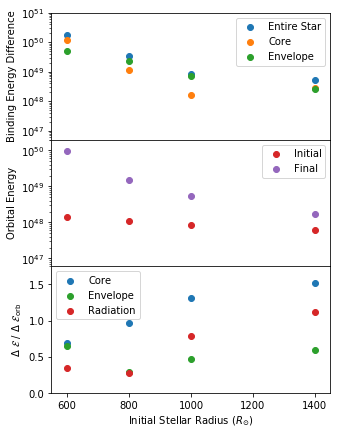

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(5,7), sharex=True)
plt.subplots_adjust(hspace=0)

radii = np.array([600, 800, 1000, 1400])

ax[0].scatter(radii, abs(np.array(binding_energy_initial) - np.array(binding_energy_final)), label='Entire Star')
ax[0].scatter(radii, abs(np.array(binding_energy_core_initial) - np.array(binding_energy_core_final)), label='Core')
ax[0].scatter(radii, abs(np.array(binding_energy_envelope_initial) - np.array(binding_energy_envelope_final)), label='Envelope')

ax[0].set_ylabel("Binding Energy Difference")
ax[0].legend()
ax[0].set_yscale('log')
ax[0].set_ylim(5.0e46, 1.0e51)



ax[1].scatter(radii, orbital_energy_initial, label='Initial', color='C3')
ax[1].scatter(radii, orbital_energy_final, label='Final', color='C4')
# ax[1].scatter(radii, ionization_energy_initial, label='Initial')
# ax[1].scatter(radii, ionization_energy_final, label='Final')
ax[1].set_ylabel("Orbital Energy")
ax[1].legend()
ax[1].set_yscale('log')
ax[1].set_ylim(6.0e46, 2.0e50)

delta_binding_energy = abs(np.array(binding_energy_initial) - np.array(binding_energy_final))
delta_binding_energy_envelope = abs(np.array(binding_energy_envelope_initial) - np.array(binding_energy_envelope_final))
delta_binding_energy_envelope_unbound = abs(np.array(binding_energy_envelope_initial) - np.array(binding_energy_envelope_unbound_final))
delta_orbital_energy = np.array(orbital_energy_final) - np.array(orbital_energy_initial)
delta_total_energy = np.array(total_energy_final) - np.array(total_energy_initial)
delta_total_energy_envelope = np.array(total_energy_envelope_final) - np.array(total_energy_envelope_initial)
delta_total_energy_core = np.array(total_energy_core_final) - np.array(total_energy_core_initial)
fraction_radiated = -(delta_total_energy - delta_orbital_energy) / delta_orbital_energy
fraction_envelope = -(delta_total_energy_envelope - delta_orbital_energy) / delta_orbital_energy
fraction_core = -(delta_total_energy_core - delta_orbital_energy) / delta_orbital_energy

effective_alpha_envelope = delta_orbital_energy / delta_binding_energy_envelope
effective_alpha_envelope_unbound = delta_orbital_energy / delta_binding_energy_envelope_unbound
effective_alpha_star = delta_orbital_energy / delta_binding_energy

ax[2].scatter(radii, fraction_core, label='Core')
ax[2].scatter(radii, fraction_envelope, label='Envelope', color='C2')
ax[2].scatter(radii, fraction_radiated, label='Radiation', color='C3')
# ax[2].scatter(radii, effective_alpha_envelope_unbound, label='Envelope Unbound', color='C3', marker='.')
ax[2].legend()
ax[2].set_ylim(0.0, 1.75)
ax[2].set_ylabel(r"$\Delta\ \mathcal{E}\ /\ \Delta\ \mathcal{E}_{\rm orb}$")
ax[2].set_xlabel(r"Initial Stellar Radius ($R_{\odot}$)")

plt.savefig("../figures/Energy_M30.pdf")
# plt.show()

In [31]:
def func_Roche_radius(M1, M2, A):

    q = M1 / M2
    return A * 0.49*q**(2.0/3.0) / (0.6*q**(2.0/3.0) + np.log(1.0 + q**(1.0/3.0)))



def calc_alpha_lambda_Webbink(M1, M1_core, M1_env, M2, A_i, A_f):
    
    R_1_L = func_Roche_radius(M1, M2, A_i)
    
    E_orb_after = Gconst * M1_core * M2 / (2.0 * A_f)
    E_orb_before = Gconst * M1 * M2 / (2.0 * A_i)
    E_env = Gconst * M1 * M1_env / R_1_L
    
    
    return E_env / (E_orb_after - E_orb_before)


def calc_E_bind_Webbink(M1, M1_core, M1_env, M2, A_i):
    
    R_1_L = func_Roche_radius(M1, M2, A_i)
    E_env = Gconst * M1 * M1_env / R_1_L
    
    return E_env 



def calc_alpha_lambda_de_Marco(M1, M1_core, M1_env, M2, A_i, A_f):
    
    R_1 = A_i/0.99
    
    E_orb_after = Gconst * M1_core * M2 / (2.0 * A_f)
    E_orb_before = Gconst * M1 * M2 / (2.0 * A_i)
    E_env = Gconst * M1_env * (M1_env/2.0 + M1_core) / R_1
    
    
    return E_env / (E_orb_after - E_orb_before)


def calc_E_bind_de_Marco(M1, M1_core, M1_env, M2, A_i):
    
    R_1 = A_i/0.99
    E_env = Gconst * M1_env * (M1_env/2.0 + M1_core) / R_1
    
    return E_env 


def calc_E_orb_diff(M1, M1_core, M1_env, M2, A_i, A_f):
    R_1 = A_i/0.99
    
    E_orb_after = Gconst * M1_core * M2 / (2.0 * A_f)
    E_orb_before = Gconst * M1 * M2 / (2.0 * A_i)
    
    return E_orb_after - E_orb_before


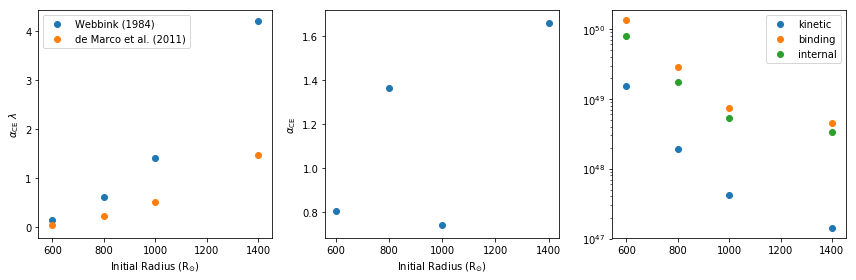

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))


# Calculate the binding energy of the remaining envelope using the initial model
kinetic_energy = []
binding_energy = []
internal_energy_before = []
internal_energy_after = []
for k, model in enumerate(models_initial):
    
    internal_energy_tmp = 0.0
    binding_energy_tmp = 0.0
    for i in range(len(model)):
        binding_energy_tmp += Gconst * model['dm'][i] * model['mass'][i]*Msun / (10**model['logR'][i]*Rsun)
        internal_energy_tmp += model['energy'][i]* model['dm'][i]
        if model['mass'][i] < companion_position_mass[k]: break

    binding_energy.append(binding_energy_tmp)    
    internal_energy_before.append(internal_energy_tmp)
binding_energy = np.array(binding_energy)
internal_energy_before = np.array(internal_energy_before)


for k, model in enumerate(models):
    kinetic_energy_tmp = 0.0
    internal_energy_tmp = 0.0
    for i in range(len(model)):
        kinetic_energy_tmp += 0.5 * model['velocity'][i]**2 * model['dm'][i]
        internal_energy_tmp += model['energy'][i]* model['dm'][i]
        if model['mass'][i] < companion_position_mass[k]: break

    kinetic_energy.append(kinetic_energy_tmp)
    internal_energy_after.append(internal_energy_tmp)
kinetic_energy = np.array(kinetic_energy)
internal_energy_after = np.array(internal_energy_after)

# Calculation alpha*lambda using both the Webbink (1984) and de Marco et al. (2011) prescriptions
alpha_lambda_Webbink = []
alpha_lambda_de_Marco = []
E_bind_Webbink = []
E_bind_de_Marco = []
delta_E_orb = []

for k, model in enumerate(models):
    
    M1 = model['mass'][0]*Msun
    
    M1_core = companion_position_mass[k]*Msun
    M1_env = M1 - M1_core

    M2 = 8.0 * Msun


    A_i = 0.99 * 10**models_initial[k]['logR'][0] * Rsun

    mass_radius = interp1d(model['mass'], 10**model['logR'])
    A_f = mass_radius(companion_position_mass[k]) * Rsun

    
    alpha_lambda_Webbink.append(calc_alpha_lambda_Webbink(M1, M1_core, M1_env, M2, A_i, A_f))
    alpha_lambda_de_Marco.append(calc_alpha_lambda_de_Marco(M1, M1_core, M1_env, M2, A_i, A_f))
    
    E_bind_Webbink.append(calc_E_bind_Webbink(M1, M1_core, M1_env, M2, A_i))
    E_bind_de_Marco.append(calc_E_bind_de_Marco(M1, M1_core, M1_env, M2, A_i))
    
    delta_E_orb.append(calc_E_orb_diff(M1, M1_core, M1_env, M2, A_i, A_f))
    
alpha_lambda_Webbink = np.array(alpha_lambda_Webbink)
alpha_lambda_de_Marco = np.array(alpha_lambda_de_Marco)
E_bind_Webbink = np.array(E_bind_Webbink)
E_bind_de_Marco = np.array(E_bind_de_Marco)
delta_E_orb = np.array(delta_E_orb)

lambda_Webbink = E_bind_Webbink / binding_energy
lambda_de_Marco = E_bind_de_Marco / binding_energy
alpha_Webbink = alpha_lambda_Webbink / lambda_Webbink
alpha_de_Marco = alpha_lambda_de_Marco / lambda_de_Marco

alpha = (-(internal_energy_after - internal_energy_before) + kinetic_energy - binding_energy) / -delta_E_orb


    
    
ax[0].set_xlabel(r"Initial Radius (R$_{\odot}$)")
ax[0].set_ylabel(r"$\alpha_{\rm CE}\ \lambda$")
    
ax[0].scatter(radii, alpha_lambda_Webbink, label='Webbink (1984)')
ax[0].scatter(radii, alpha_lambda_de_Marco, label='de Marco et al. (2011)')

ax[0].legend()



ax[1].set_xlabel(r"Initial Radius (R$_{\odot}$)")
ax[1].set_ylabel(r"$\alpha_{\rm CE}$")
    
ax[1].scatter(radii, alpha, label='Webbink (1984)')
# ax[1].scatter(radii, alpha_de_Marco, label='de Marco et al. (2011)')


ax[2].scatter(radii, kinetic_energy, label='kinetic')
ax[2].scatter(radii, binding_energy, label='binding')
ax[2].scatter(radii, internal_energy_before - internal_energy_after, label='internal')
ax[2].set_yscale('log')
ax[2].legend()


plt.tight_layout()
plt.savefig("../figures/alpha_CE.pdf")
# plt.show()

In [131]:
print(M30_1000R['velocity'], M30_1000R['velocity'])

[  6.16833450e+06   6.16834694e+06   6.16836156e+06 ...,   1.09143091e-03
   8.82904034e-04   7.05217324e-04]


In [120]:
# 1000 Rsun
file_dir = data_dir + '8M_30M_1000R_history.data'
M30_1000R_history = np.genfromtxt(file_dir, skip_header=5, names=True)

# 1400 Rsun
file_dir = data_dir + '8M_30M_1400R_history.data'
M30_1400R_history = np.genfromtxt(file_dir, skip_header=5, names=True)

# 600 Rsun
file_dir = data_dir + '8M_30M_600R_history.data'
M30_600R_history = np.genfromtxt(file_dir, skip_header=5, names=True)

# 800 Rsun
file_dir = data_dir + '8M_30M_800R_history.data'
M30_800R_history = np.genfromtxt(file_dir, skip_header=5, names=True)

In [125]:
models_history = [M30_600R_history, M30_800R_history, M30_1000R_history, M30_1400R_history]
models_names = ["R = 600 R$_{\odot}$", r"R = 800 R$_{\odot}$", r"R = 1000 R$_{\odot}$", r"R = 1400 R$_{\odot}$"]

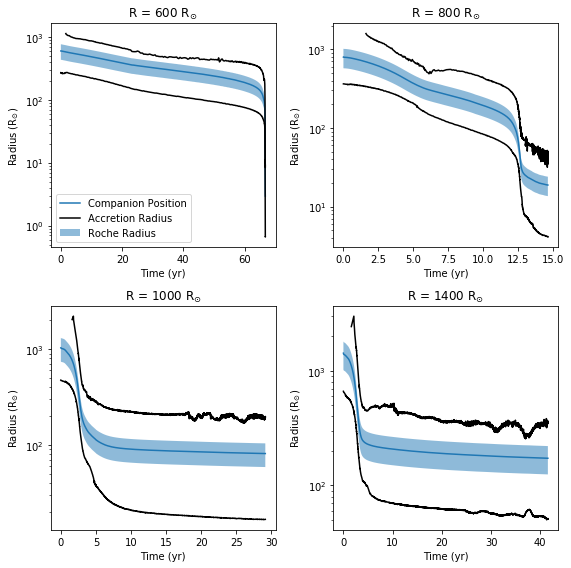

In [145]:
fig, ax = plt.subplots(2, 2, figsize=(8,8))

for i, model in enumerate(models_history):
    k = i%2
    j = int(i/2.)
    
    ax[j,k].plot(model['star_age'], model['CE_companion_position_r'], label='Companion Position')
    # R_acc_low = model['R_acc_low']/Rsun
    # R_acc_high = np.
    # plt.fill_between(model['star_age'], R_acc_low, model['R_acc_high']/Rsun)
    ax[j,k].plot(model['star_age'][model['star_age']>1.6], model['CE_companion_position_r'][model['star_age']>1.6] + model['R_acc_high'][model['star_age']>1.6]/Rsun, color='k')
    ax[j,k].plot(model['star_age'], model['CE_companion_position_r'] - model['R_acc_low']/Rsun, color='k', label='Accretion Radius')


    R_roche = func_Roche_radius(8.0, model['CE_companion_position_m'][0], model['CE_companion_position_r'])
    ax[j,k].fill_between(model['star_age'], model['CE_companion_position_r']-R_roche, model['CE_companion_position_r']+R_roche,
                         alpha=0.5, label='Roche Radius')

    ax[j,k].set_title(models_names[i])



# ax[0,0].set_ylim(1.0, 1500)


for i in range(2):
    for j in range(2):
        ax[i,j].set_yscale('log')
        ax[i,j].set_ylabel(r"Radius (R$_{\odot}$)")
        ax[i,j].set_xlabel(r"Time (yr)")

        
ax[0,0].legend()

plt.tight_layout()
# plt.savefig("../figures/Roche_accretion_radius_M30.pdf")
plt.show()

In [104]:
def func_Roche_radius(M1, M2, A):
    """ Get Roche lobe radius (Eggleton 1983)

    Parameters
    ----------
    M1 : float
        Primary mass (Msun)
    M2 : float
        Secondary mass (Msun)
    A : float
        Orbital separation (any unit)

    Returns
    -------
    Roche radius : float
        in units of input, A
    """
    
    q = M1 / M2

    return A * 0.49*q**(2.0/3.0) / (0.6*q**(2.0/3.0) + np.log(1.0 + q**(1.0/3.0)))

In [5]:
def set_interpolations(star):
    star_m_encl = interp1d(star['radius']*Rsun, star['mass']*Msun)
    star_log10_rho = interp1d(star['radius']*Rsun, star['logRho'])
    star_pressure_scale_height = interp1d(star['radius']*Rsun, star['pressure_scale_height']*Rsun)
    star_csound = interp1d(star['radius']*Rsun, star['csound'])
    star_t_thermal_to_surf = interp1d(star['radius']*Rsun, 10**star['log_thermal_time_to_surface'])
    dM_dr = star["dm"]/star["dr"]
    star_dM_dr = interp1d(star['radius']*Rsun, dM_dr)

    return star_m_encl, star_log10_rho, star_pressure_scale_height, star_csound, star_t_thermal_to_surf, star_dM_dr

In [6]:
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2

### Keplerian velocity function

In [7]:
def get_keplerian_velocity(M_enclosed, M_companion, a_separation):
    """ Provides the keplerian velocity (circular orbit)
    
    Arguments
    ---------
    M_enclosed : float
        Enclosed mass of the companion, assumed to be a point (Msun)
    M_companion : float
        Companion mass (Msun)
    a_separation : float
        Orbital separation (Rsun)
        
    Returns
    -------
    v_orb : float
        circular orbital velocity (km/s)
    """
    
    v_squared = Gconst * (M_enclosed + M_companion) * Msun / (a_separation * Rsun)
    v_orb = np.sqrt(v_squared) / 1.0e5 # converted from cm/s to km/s
    
    return v_orb

### Gravitational potential

In [8]:
def get_E_grav(M_enclosed, M_companion, a_separation):
    """ Provides the gravitational potential energy
    
    Arguments
    ---------
    M_enclosed : float
        Enclosed mass of the companion, assumed to be a point (Msun)
    M_companion : float
        Companion mass (Msun)
    a_separation : float
        Orbital separation (Rsun)
        
    Returns
    -------
    E_grav : float
        gravitational potential energy (erg)
    """

    E_grav = -Gconst * (M_enclosed*Msun) * (M_companion*Msun) / (a_separation*Rsun)
    
    return E_grav

### Orbital period

In [9]:
def get_P_orb(M_enclosed, M_companion, a_separation):
    """ Provides the orbital period
    
    Arguments
    ---------
    M_enclosed : float
        Enclosed mass of the companion, assumed to be a point (Msun)
    M_companion : float
        Companion mass (Msun)
    a_separation : float
        Orbital separation (Rsun)
        
    Returns
    -------
    P_orb : float
        Orbital period (s)
    """

    vel = get_keplerian_velocity(M_enclosed, M_companion, a_separation) * 1.0e5 # velocity in cm/s
    circumference = 2.0 * np.pi * a_separation*Rsun
    
    P_orb = circumference / vel
    
    return P_orb

### Define the frictional drag force from MacLeod & Ramirez-Ruiz (2015)

In [10]:
def get_F_drag(mass_in, vel_in, rho, scale_height):
    """ Provides the drag force from an inspiraling object
    
    Arguments
    ---------
    mass_in : float
        Companion mass (Msun)
    vel_in : float
        Companion velocity - assumed to be the Keplerian orbital (km/s)
    rho : float
        Local density (g/cm^3)
    scale_height : float
        Local pressure scale height (cm)
        
    Returns
    -------
    F_drag : float
        Drag force on the inspiraling companion (erg/s)
    """
    
    # Convert units to cgs
    mass = mass_in * Msun # Msun to g
    vel = vel_in * 1.0e5 # km/s to cm/s
        
    # Accretion radius
    R_accretion = 2.0 * Gconst * mass / vel**2
    
    # ratio of accretion radius to scale height
    eta = R_accretion / scale_height

    # Hoyle-Littleton drag
    F_drag_HL = np.pi * R_accretion**2 * rho * vel**2
    
    # Factor to adjust Hoyle-Littleton drag to MacLeod & Ramirez-Ruiz (2015) simulations
    f_factor = 1.91791946 + -1.52814698*eta + 0.75992092*eta**2
        
    # Drag force
    F_drag = F_drag_HL * f_factor
    
    return F_drag

### Now, let's define derivatives for the inspiral over the static stellar profile

In [11]:
def get_dE_dr(E_in, r_in, M_companion, star_m_encl, star_dM_dr):
    """ Calculates the energy dissipation rate with respect to radius
    
    Arguments
    ---------
    E_in : float
        Total energy dissipated in star (erg)
    star_m_encl : interp1d object
        Enclosed mass interpolation object (Msun)
    star_dM_dr : interp1d object
        dM_dr interpolation object (g/cm)
    r_in : float
        The radius in question (cm)
    M_companion : float
        The companion mass to the star (Msun)
        
    Returns
    -------
    dE_dr : float
        The derivative of radius with respect to radius (erg/cm)    
    """
    
    # Calculate dE_dr
    m_encl = star_m_encl(r_in)
    dM_dr = star_dM_dr(r_in)
    dE_dr = -Gconst * dM_dr * (M_companion*Msun) / (2.0*r_in) + Gconst * (m_encl * (M_companion*Msun)) / (2.0*r_in**2)

    return dE_dr



    
def get_dE_dt(E_in, r_in, M_companion, star_m_encl, star_log10_rho, star_pressure_scale_height):
    """ Calculates the energy dissipation rate
    
    Arguments
    ---------
    E_in : float
        Total energy dissipated in star (erg)
    r_in : float
        The radius in question (cm)
    M_companion : float
        The companion mass to the star (Msun)
    star_m_encl : interp1d object
        Enclosed mass interpolation object (Msun)
    star_log10_rho : interp1d object
        log10 density interpolation object (g/cm^3)
    star_pressure_scale_height : interp1d object
        Pressure scale height interpolation object (cm)
        
    Returns
    -------
    dE_dt : float
        The derivative of radius with respect to time (erg/s)    
    """
    
    # Calculate dE_dt
    m_encl = star_m_encl(r_in)
    velocity = get_keplerian_velocity(m_encl/Msun, M_companion, r_in/Rsun)
    rho = 10**star_log10_rho(r_in)
    scale_height = star_pressure_scale_height(r_in)
    dE_dt = -get_F_drag(M_companion, velocity, rho, scale_height) * (velocity*1.0e5)

    return dE_dt


    

def get_dr_dt(r_in, t_in, M_companion, star_m_encl, star_log10_rho, star_pressure_scale_height, star_dM_dr):
    """ Calculates the inspiral time of the star
    
    Arguments
    ---------
    r_in : float
        The radius in question (cm)
    t_in : float
        Latent variable for derivative
    M_companion : float
        The companion mass to the star (Msun)
    star_m_encl : interp1d object
        Enclosed mass interpolation object (Msun)
    star_log10_rho : interp1d object
        log10 density interpolation object (g/cm^3)
    star_pressure_scale_height : interp1d object
        Pressure scale height interpolation object (cm)
    star_dM_dr : interp1d object
        dM_dr interpolation object (g/cm)
        
    Returns
    -------
    dr_dt : float
        The derivative of radius with respect to time (cm/s)
    """
    
    # Calculate dE_dt
    m_encl = star_m_encl(r_in)
    velocity = get_keplerian_velocity(m_encl/Msun, M_companion, r_in/Rsun)
    rho = 10**star_log10_rho(r_in)
    scale_height = star_pressure_scale_height(r_in)
    dE_dt = -get_F_drag(M_companion, velocity, rho, scale_height) * (velocity*1.0e5)
    
    # Calculate dE_dr
    dM_dr = star_dM_dr(r_in)
    dE_dr = -Gconst * dM_dr * (M_companion*Msun) / (2.0*r_in) + Gconst * (m_encl * (M_companion*Msun)) / (2.0*r_in**2)
    
    # dr_dt
    dr_dt = dE_dt / dE_dr
        
    return dr_dt
    

In [12]:
def get_dE_dm(r_in, M_companion, star_m_encl, star_dM_dr):
    """ Calculates the energy deposited per mass
    
    Arguments
    ---------
    r_in : float
        The radius in question (cm)
    M_companion : float
        The companion mass to the star (Msun)
    star_m_encl : interp1d object
        Enclosed mass interpolation object (Msun)
    star_dM_dr : interp1d object
        dM_dr interpolation object (g/cm)
        
    Returns
    -------
    dE_dm : float
        The derivative of energy with respect to mass (eta)
    """
    m_encl = star_m_encl(r_in)
    dM_dr = star_dM_dr(r_in)

    dE_dr = -Gconst * dM_dr * (M_companion*Msun) / (2.0*r_in) + Gconst * (m_encl * (M_companion*Msun)) / (2.0*r_in**2)

    return dE_dr / dM_dr


In [29]:
M_companion = 1.4
star = M15_700R

star_m_encl, star_log10_rho, star_pressure_scale_height, star_csound, \
                             star_t_thermal_to_surf, star_dM_dr = set_interpolations(star)


# Determine the mass and radius at which the companion merges based on the Hill radius
r_hill = star['radius'] * (M_companion*Msun / (3.0 * star_m_encl(star['radius']*Rsun)))**(1./3.)
R_companion = (M_companion)**0.8
merger_idx = np.argmin(np.abs(R_companion - r_hill))
merger_mass = star['mass'][merger_idx]
merger_radius = star['radius'][merger_idx]

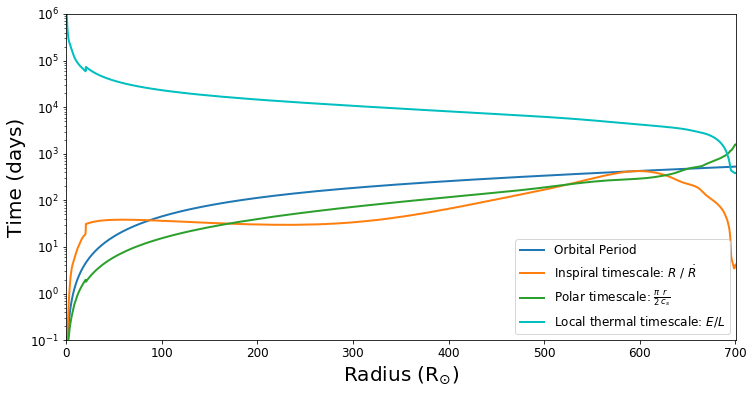

In [30]:
plt.figure(figsize=(12,6))

r_test = star["radius"]*Rsun
time = 0.0


def get_delta_t_therm(M_enclosed, M_companion, a_separation):

    vel = get_keplerian_velocity(M_enclosed, M_companion, a_separation) * 1.0e5 # velocity in cm/s
    R_accretion = 2.0 * Gconst * M_companion*Msun / vel**2

    t_thermal_low = star_t_thermal_to_surf(a_separation*Rsun)
    max_rad_array = star['radius'][0]*Rsun * np.ones(len(a_separation))
    t_thermal_high = star_t_thermal_to_surf(np.amin(np.vstack([a_separation*Rsun + R_accretion, max_rad_array]), axis=0))

    return t_thermal_high - t_thermal_low





dr_dt = get_dr_dt(r_test, time, M_companion, star_m_encl, star_log10_rho, star_pressure_scale_height, star_dM_dr)
P_orb = get_P_orb(star_m_encl(r_test)/Msun, M_companion, r_test/Rsun) / secday
plt.plot(r_test/Rsun, P_orb, label='Orbital Period')
plt.plot(r_test/Rsun, np.abs(r_test / dr_dt / secday), label=r'Inspiral timescale: $R$ / $\dot{R}$')



plt.plot(r_test/Rsun, np.pi/2. * r_test/star_csound(r_test) / secday, label=r'Polar timescale: $\frac{\pi}{2} \frac{r}{c_s}$')

# Energy radiation timescale
plt.plot(star['radius'], star['energy']/star['luminosity'] / secday, color='c', label=r'Local thermal timescale: $E/L$')


plt.xlabel(r'${\rm Radius}\ ({\rm R}_{\odot})$', size=20)
plt.ylabel('Time (days)', size=20)

plt.xlim(0.1, star['radius'][0])
plt.ylim(0.1, 1000000)
#plt.xscale('log')
plt.yscale('log')

plt.legend(loc=4)

plt.show()

### Now, let's look at some energies

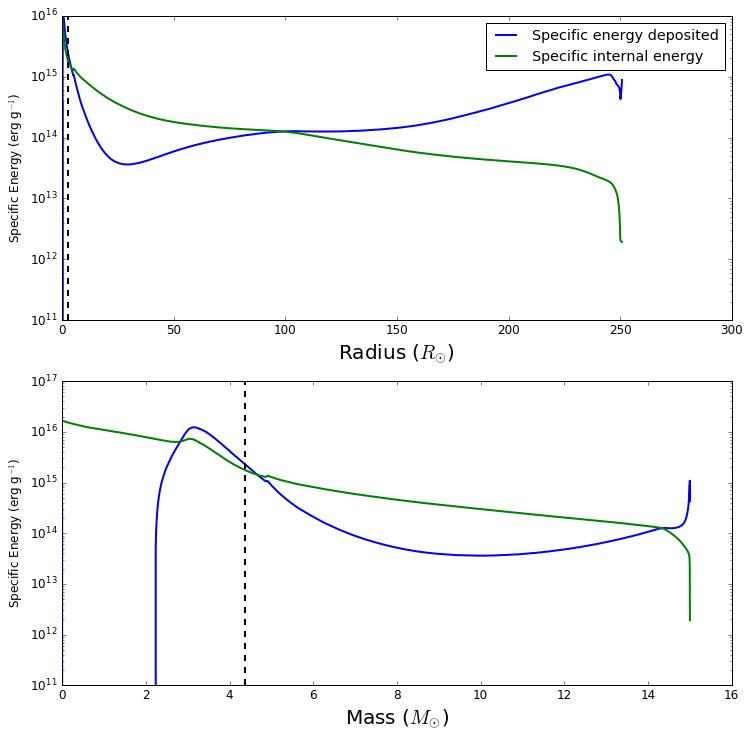

In [93]:
fig, ax = plt.subplots(2, 1, figsize=(12,12))


dE_dm = get_dE_dm(star['radius']*Rsun, M_companion, star_m_encl, star_dM_dr)

ax[0].plot(star['radius'], dE_dm, label='Specific energy deposited')
ax[0].plot(star['radius'], star['energy'], label='Specific internal energy')
ax[0].legend()
ax[0].set_ylim(1.0e11, 1.0e16)
ax[0].set_yscale('log')
ax[0].set_xlabel(r'Radius ($R_{\odot}$)', size=20)
ax[0].set_ylabel(r'Specific Energy (erg g$^{-1}$)')
ax[0].axvline(merger_radius, color='k', linestyle='dashed')


ax[1].plot(star['mass'], dE_dm, label='Specific energy deposited')
ax[1].plot(star['mass'], star['energy'], label='Specific internal energy')
ax[1].set_ylim(1.0e11, 1.0e17)
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Mass ($M_{\odot}$)', size=20)
ax[1].set_ylabel(r'Specific Energy (erg g$^{-1}$)')
ax[1].axvline(merger_mass, color='k', linestyle='dashed')


plt.show()